# Forecasting with Temporian and TensorFlow Decision Forests

## Install and import dependencies


In [ ]:
%pip install temporian -q

# The Bokeh package is used by Temporian to create interactive plots.
# If if Bokeh is not installed, Temporian plots are static.
%pip install bokeh -q

In [1]:
import os
import pandas as pd
import temporian as tp
import datetime
import concurrent.futures

In [2]:
start_date = datetime.date(2018, 4, 1)
end_date = datetime.date(2018, 4, 30)
#end_date = datetime.date(2018, 9, 30)

filenames = []
while start_date <= end_date:
    filenames.append(f"{start_date}")
    start_date += datetime.timedelta(days=1)
print(f"{len(filenames)} dates")

30 dates


In [3]:
def load_date(filename):
    print(".",end="", flush=True)
    return pd.read_pickle(f"https://github.com/Fraud-Detection-Handbook/simulated-data-raw/raw/main/data/{filename}.pkl")

print("Loading dataset",end="")
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    frames = executor.map(load_date, filenames)
pandas_dataset = pd.concat(frames)
print("done")
print(f"Found {len(pandas_dataset)} transactions")

Loading dataset..............................done
Found 288062 transactions


In [4]:
pandas_dataset

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
...,...,...,...,...,...,...,...,...,...
288057,288057,2018-04-30 23:56:58,818,7690,48.92,2591818,29,0,0
288058,288058,2018-04-30 23:57:38,3763,7460,99.06,2591858,29,0,0
288059,288059,2018-04-30 23:57:39,2000,8998,83.24,2591859,29,0,0
288060,288060,2018-04-30 23:58:01,2566,6688,109.55,2591881,29,0,0


In [5]:
pandas_dataset = pandas_dataset[["TX_DATETIME", "CUSTOMER_ID", "TERMINAL_ID", "TX_AMOUNT", "TX_FRAUD"]]

In [6]:
dataset = tp.from_pandas(pandas_dataset, timestamps="TX_DATETIME")

In [7]:
dataset

indexes: []
features: [('CUSTOMER_ID', str_), ('TERMINAL_ID', str_), ('TX_AMOUNT', float64), ('TX_FRAUD', int64)]
events:
     (288062 events):
        timestamps: [1.5225e+09 1.5225e+09 1.5225e+09 ... 1.5251e+09 1.5251e+09 1.5251e+09]
        'CUSTOMER_ID': ['596' '4961' '2' ... '2000' '2566' '1274']
        'TERMINAL_ID': ['3156' '3412' '1365' ... '8998' '6688' '4535']
        'TX_AMOUNT': [ 57.16  81.51 146.   ...  83.24 109.55  79.02]
        'TX_FRAUD': [0 0 0 ... 0 0 0]
memory usage: 16.1 MB

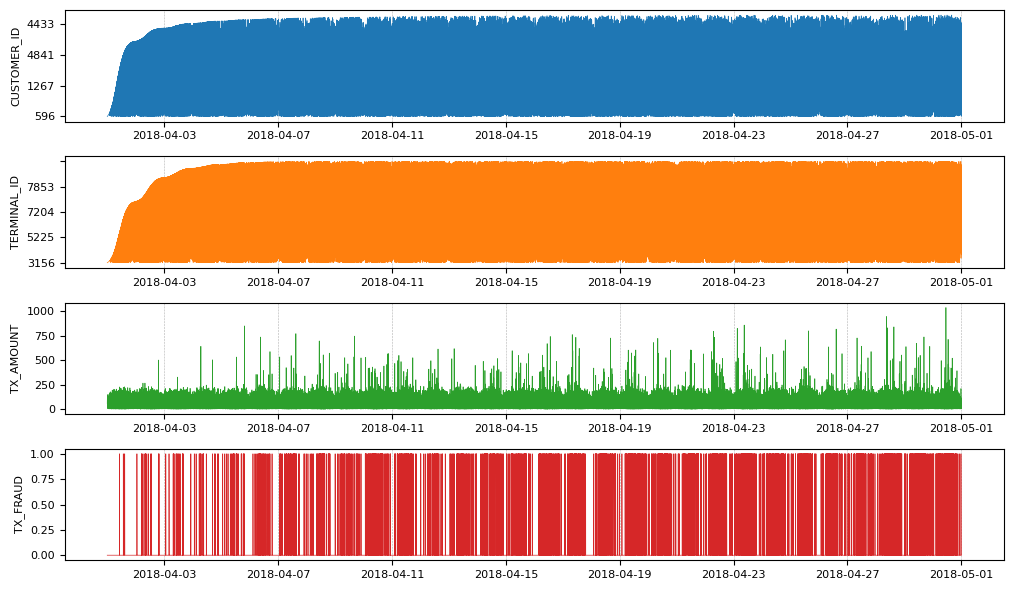

In [8]:
dataset.plot()

In [12]:
x = dataset.node()
x = tp.filter(x, tp.equal_scalar(x["CUSTOMER_ID"], "596"))
x = tp.add_index(x, ["CUSTOMER_ID"])

x.evaluate(dataset).plot()

Build schedule
Run 4 operators
    1 / 4: SELECT [0.00007 s]
    2 / 4: EQUAL_SCALAR

UFuncTypeError: ufunc 'equal' did not contain a loop with signature matching types (<class 'numpy.dtype[str_]'>, <class 'numpy.dtype[str_]'>) -> <class 'numpy.dtype[bool_]'>

In [15]:
import numpy as np
a = np.array(["a","b"])
np.char.equal(a,a)

array([ True,  True])

In [16]:
a.dtype

dtype('<U1')